## Observations and Insights 

* Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.

In [66]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np

plt.style.use('seaborn')
# Study data files
mouse_metadata_path = "Resources/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "Resources/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(study_results,mouse_metadata).sort_values('Tumor Volume (mm3)')

# Display the data table for preview
mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
514,k403,45,22.050126,1,Ramicane,Male,21,16
1700,s185,45,23.343598,1,Capomulin,Female,3,17
513,k403,40,24.365505,1,Ramicane,Male,21,16
1699,s185,40,25.472143,1,Capomulin,Female,3,17
512,k403,35,26.546993,1,Ramicane,Male,21,16


In [24]:
# Checking the number of mice.
mouse_df['Mouse ID'].count()

1893

# Clean the Data

* Create a clean DataFrame by dropping the duplicate mouse by its ID.

    * **Optional**: Get all the data for the duplicate mice that shows up for Mouse ID and Timepoint. 

In [25]:
#mouse_df = mouse_df.set_index('Mouse ID')
#mouse_dfidx = mouse_df.index
#idx = pd.Index([mouse_dfidx])
#idx.duplicated()

In [26]:
# Optional: Get all the data for the duplicate mouse ID. 
#dup_mouseid= mouse_df.groupby(['Mouse ID'])
dup_mouseid=mouse_df.duplicated(["Mouse ID"], keep=False)
dup_mousedf = mouse_df[dup_mouseid]

In [27]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanmouse_df=mouse_df.drop_duplicates(subset=['Mouse ID'],keep='last')
cleanmouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
617,s508,0,45.000000,0,Ramicane,Male,1,17
595,m546,0,45.000000,0,Ramicane,Male,18,16
575,a520,0,45.000000,0,Ramicane,Male,13,21
555,i177,0,45.000000,0,Ramicane,Male,10,18
637,z578,0,45.000000,0,Ramicane,Male,11,16
...,...,...,...,...,...,...,...,...
192,t724,45,75.113288,2,Naftisol,Female,2,25
859,m269,45,75.123690,1,Stelasyn,Female,22,28
50,p189,45,75.294936,4,Ketapril,Male,8,28
155,l725,45,76.668817,3,Naftisol,Female,8,26


In [28]:
# Checking the number of mice in the clean DataFrame.
cleanmouse_df['Mouse ID'].count()

249

## Summary Statistics

* Use groupby and summary statistical methods to Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
* Assemble the resulting series into a single summary dataframe.

In [29]:
# summary statistics table
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
mouse_mean = pd.DataFrame(cleanmouse_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean())
mouse_med = pd.DataFrame(cleanmouse_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median())
mouse_var = pd.DataFrame(cleanmouse_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var())
mouse_std = pd.DataFrame(cleanmouse_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std())
mouse_sem = pd.DataFrame(cleanmouse_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem())

# Assemble the resulting series into a single summary dataframe.
mouse_groupdf = pd.concat((mouse_mean,mouse_med,mouse_var,mouse_std,mouse_sem),axis=1)
mouse_groupdf=mouse_groupdf.set_axis(['Tumor Vol Mean','Tumor Vol Median','Tumor Vol Varience','Tumor Vol StandDev','Tumor Vol SEM'], axis=1)
mouse_groupdf

,Tumor Vol Mean,Tumor Vol Median,Tumor Vol Varience,Tumor Vol StandDev,Tumor Vol SEM
Drug Regimen,,,,,
Capomulin,46.119199,45.893720,1.019059,1.009485,0.201897
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.525392,60.165180,61.216264,7.824082,1.564816
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,45.678645,45.521875,0.587093,0.766220,0.153244
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


* Using the aggregation method, try to produce the same summary statistics in a single line of code

In [30]:
# Using the aggregation method, try to produce the same summary statistics in a single line of code
cleanmouse_aggdf = cleanmouse_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})
cleanmouse_aggdf

Tumor Volume (mm3)                                            
                           mean     median         var        std       sem
Drug Regimen                                                               
Capomulin             46.119199  45.893720    1.019059   1.009485  0.201897
Ceftamin              57.753977  59.851956   69.982735   8.365568  1.673114
Infubinol             58.525392  60.165180   61.216264   7.824082  1.564816
Ketapril              62.806191  64.487812   98.921330   9.945920  1.989184
Naftisol              61.205757  63.283288  106.029927  10.297083  2.059417
Placebo               60.508414  62.030594   78.759797   8.874672  1.774934
Propriva              56.736964  55.841410   69.349002   8.327605  1.665521
Ramicane              45.678645  45.521875    0.587093   0.766220  0.153244
Stelasyn              61.001707  62.192350   90.331586   9.504293  1.940056
Zoniferol             59.181258  61.840058   76.862027   8.767099  1.753420

## Bar and Pie Charts

**Compare plot methods**
* Generate a bar plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` that shows the total number of measurements taken for each treatment regimen throughout the course of the study.

* Generate a pie plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` that shows the distribution of female or male mice in the study.

  * **NOTE:** The `DataFrame.plot()` plots and `pyplot` plots should look identical.

**Rember**: You must use proper labeling of your plots, to include properties such as: plot titles, axis labels, legend labels, _x_-axis and _y_-axis limits, etc.

In [31]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

In [32]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, Outliers and Boxplots

* Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: **Capomulin, Ramicane, Infubinol, and Ceftamin**

     * Start by getting the last (greatest) timepoint for each mouse

     * Merge this group df with the original dataframe to get the tumor volume at the last timepoint

In [45]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# pull out only the 4 drug reg data
drugs = ['Capomulin','Ramicane','Infubinol','Ceftamin']
drugs_df=mouse_df[mouse_df['Drug Regimen'].isin(drugs)]

# Get the last (greatest) timepoint for each mouse
agg_df = drugs_df.groupby(['Drug Regimen', 'Mouse ID']).agg({'Timepoint':['max']})
agg_df

Timepoint
                            max
Drug Regimen Mouse ID          
Capomulin    b128            45
             b742            45
             f966            20
             g288            45
             g316            45
...                         ...
Ramicane     s508            45
             u196            45
             w678             5
             y449            15
             z578            45

[100 rows x 1 columns]

In [36]:
# CANT FIGURE OUT THE ARGUMENT INSIDE .LOC 
#drugs_df.loc(drugs_df['Drug Regimen']==('Capomulin','Ramicane','Infubinol','Ceftamin'))

In [37]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df= pd.merge(drugs_df,agg_df, on='Mouse ID',suffixes=(False, False))

#rename the tuple column header
merge_df.rename(columns={ ('Timepoint', 'max'):'Timepoint Max'}, inplace=True)

#pull only the max time points from the df for ending tumor vol
merge_df=merge_df.loc[merge_df['Timepoint']==merge_df['Timepoint Max']]
merge_df

C:\Users\Ema\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Timepoint Max
0,k403,45,22.050126,1,Ramicane,Male,21,16,45
10,s185,45,23.343598,1,Capomulin,Female,3,17,45
21,x401,45,28.484033,0,Capomulin,Female,16,15,45
30,m601,45,28.430964,1,Capomulin,Male,22,17,45
40,g791,45,29.128472,1,Ramicane,Male,11,16,45
...,...,...,...,...,...,...,...,...,...
784,z581,45,62.754451,3,Infubinol,Female,24,25,45
794,a251,45,65.525743,1,Infubinol,Female,21,25,45
804,y163,45,67.685569,3,Infubinol,Female,17,27,45
806,v339,5,46.250112,0,Infubinol,Male,20,26,5


In [49]:
# Get the list <drugs> to set up a for loop (and later for plot labels)
drug_reg= merge_df['Drug Regimen']
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol= merge_df['Tumor Volume (mm3)']

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 


(0      22.050126
 10     23.343598
 21     28.484033
 30     28.430964
 40     29.128472
          ...    
 784    62.754451
 794    65.525743
 804    67.685569
 806    46.250112
 813    57.031862
 Name: Tumor Volume (mm3), Length: 100, dtype: float64,
 0       Ramicane
 10     Capomulin
 21     Capomulin
 30     Capomulin
 40      Ramicane
          ...    
 784    Infubinol
 794    Infubinol
 804    Infubinol
 806    Infubinol
 813    Infubinol
 Name: Drug Regimen, Length: 100, dtype: object)

In [44]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
q1 = merge_df['Tumor Volume (mm3)'].quantile(.25)
q3 = merge_df['Tumor Volume (mm3)'].quantile(.75)
IQR = q3-q1  
    
#find upper & lower bounds
lower_bound = q1 - (1.5*IQR)
upper_bound = q3+ (1.5*IQR)

# Determine outliers using upper and lower bounds
merge_df[(merge_df['Tumor Volume (mm3)']<lower_bound)|(merge_df['Tumor Volume (mm3)']>upper_bound)]
    #no results returned

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Timepoint Max


* Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens and highlight any potential outliers in the plot by changing their color and style.

  **Hint**: All four box plots should be within the same figure. Use this [Matplotlib documentation page](https://matplotlib.org/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py) for help with changing the style of the outliers.
  
  **Rember**: You must use proper labeling of your plots, to include properties such as: plot titles, axis labels, legend labels, _x_-axis and _y_-axis limits, etc.

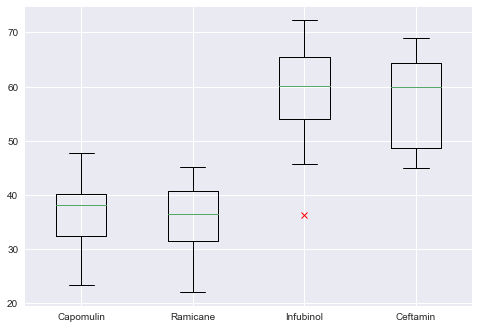

In [86]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
CAtumorvol = merge_df.loc[merge_df['Drug Regimen']=='Capomulin']['Tumor Volume (mm3)'] 
RAtumorvol = merge_df.loc[merge_df['Drug Regimen']=='Ramicane']['Tumor Volume (mm3)']
INtumorvol = merge_df.loc[merge_df['Drug Regimen']=='Infubinol']['Tumor Volume (mm3)']
CEtumorvol = merge_df.loc[merge_df['Drug Regimen']=='Ceftamin']['Tumor Volume (mm3)']

plt.boxplot([CAtumorvol,RAtumorvol,INtumorvol,CEtumorvol], labels=drugs,flierprops={'marker':'x','markeredgecolor':'r'})
plt.show()

## Line and Scatter Plots

* Select a mouse that was treated with Capomulin and generate a line plot of tumor volume vs. time point for that mouse.

* Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.

    **Rember**: You must use proper labeling of your plots, to include properties such as: plot titles, axis labels, legend labels, _x_-axis and _y_-axis limits, etc.

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

* Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment. Plot the linear regression model on top of the previous scatter plot.

    **Rember**: You must use proper labeling of your plots, to include properties such as: plot titles, axis labels, legend labels, _x_-axis and _y_-axis limits, etc.

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
